# Summary

Dans ce notebook, nous allons mettre en pratique les algorithmes de regression sur un jeu de données relatif aux faux billets de banque.

Pour rappel, voici **quelques étapes de travail** d'un **Data Scientist** sont les suivantes:

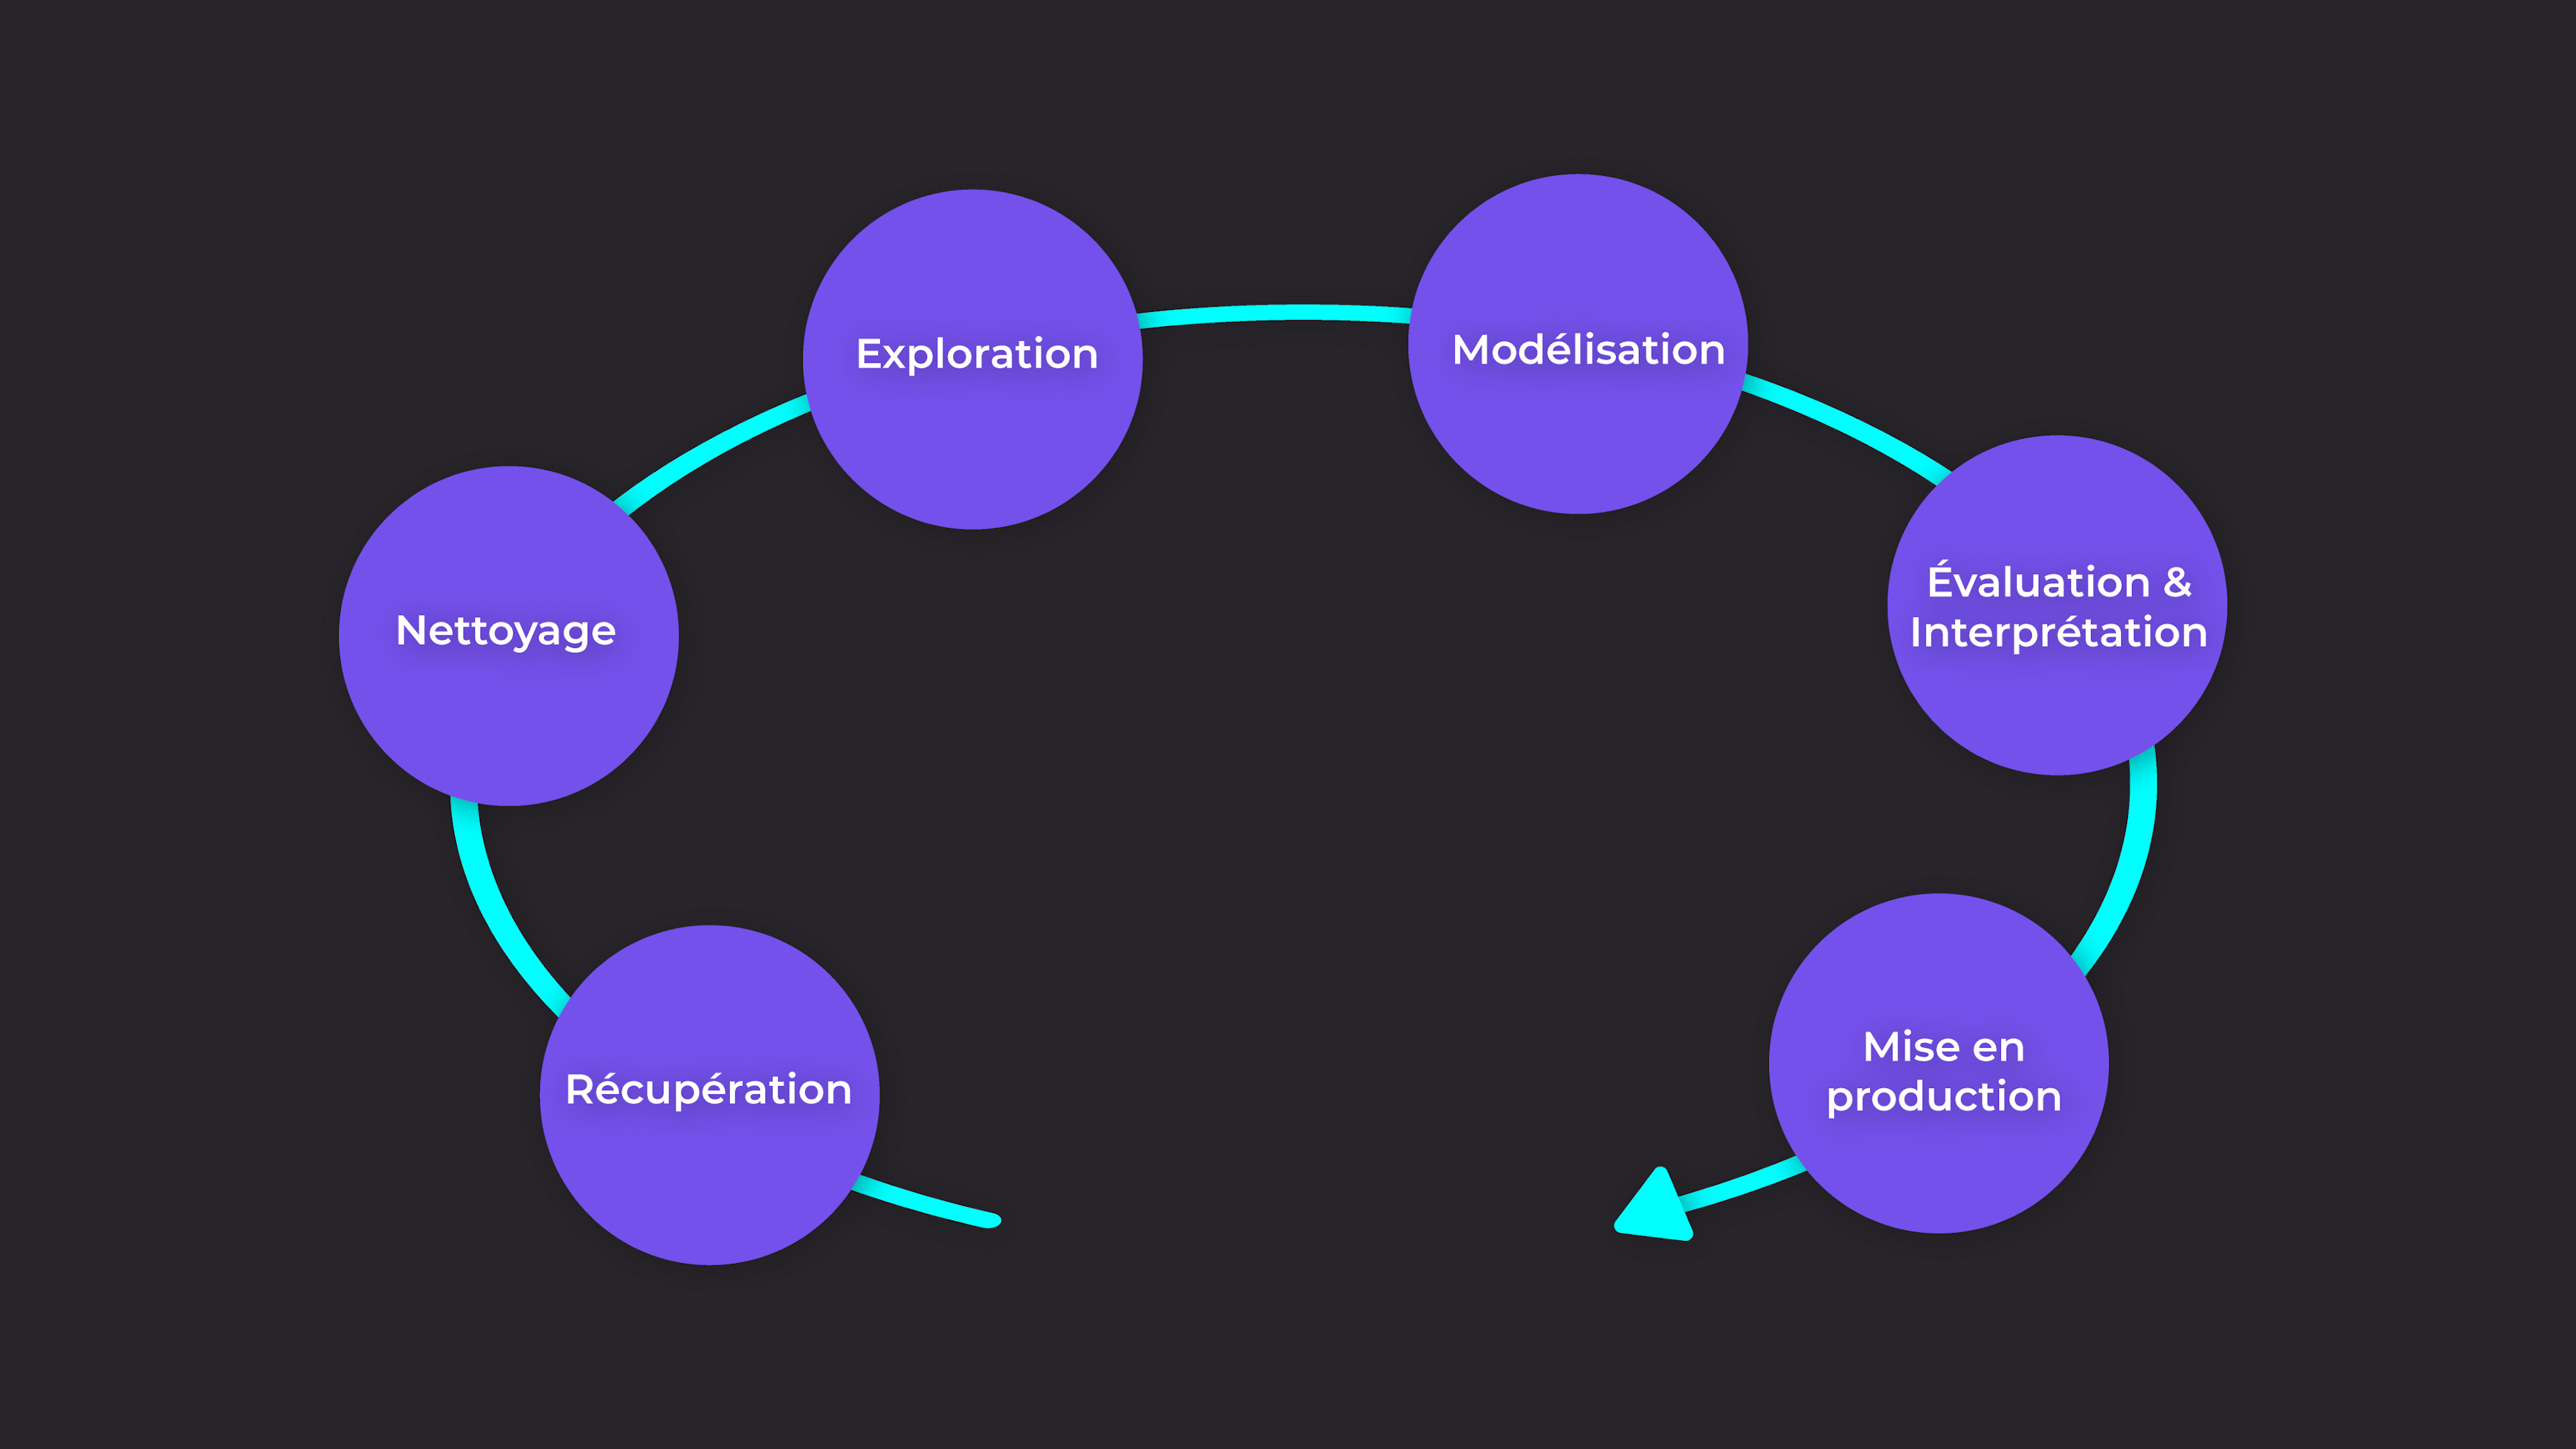

# Packages

In [45]:
!pip install ydata-profiling

  Using cached pandas-2.0.3-cp311-cp311-win_amd64.whl.metadata (18 kB)
Using cached pandas-2.0.3-cp311-cp311-win_amd64.whl (10.6 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3


In [47]:
from pathlib import Path

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from plotly.subplots import make_subplots
from ydata_profiling import ProfileReport
from yellowbrick.regressor import ResidualsPlot


In [49]:
pwd

'C:\\Users\\user\\OneDrive\\ML'

In [51]:
# Return a new path pointing to the current working directory
HOME_DIR = Path.cwd()
DATA_DIR = Path("C:/Users/user/OneDrive/ML/data")
# create a variable for data directory
DATA_DIR = Path(HOME_DIR, "data")

print(f"Work directory: {HOME_DIR} \nData directory: {DATA_DIR}")

Work directory: C:\Users\user\OneDrive\ML 
Data directory: C:\Users\user\OneDrive\ML\data


# Data collection

In [57]:
#!head -n 5 /Users/mouslydiaw/Downloads/billets.csv

C:\Users\user\OneDrive\ML\data\billets.csv


pd.read_csv?

In [53]:
# you must put the CSV file billets.csv in data directory, cf above cell
data = pd.read_csv(r"C:/Users/user/OneDrive/ML/data/billets.csv", sep=";")
#data = pd.read_csv(Path(DATA_DIR, "billets.csv"), sep=";")
data.shape  # data frame dimensions (nb rows, nb columns)

(1500, 7)

In [55]:
# Return the first `n` rows, default is 5
data.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [57]:
# Print a concise summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [59]:
# Generate descriptive statistics
data.describe(include="all")

is_genuine     diagonal  height_left  height_right   margin_low  \
count        1500  1500.000000  1500.000000   1500.000000  1463.000000   
unique          2          NaN          NaN           NaN          NaN   
top          True          NaN          NaN           NaN          NaN   
freq         1000          NaN          NaN           NaN          NaN   
mean          NaN   171.958440   104.029533    103.920307     4.485967   
std           NaN     0.305195     0.299462      0.325627     0.663813   
min           NaN   171.040000   103.140000    102.820000     2.980000   
25%           NaN   171.750000   103.820000    103.710000     4.015000   
50%           NaN   171.960000   104.040000    103.920000     4.310000   
75%           NaN   172.170000   104.230000    104.150000     4.870000   
max           NaN   173.010000   104.880000    104.950000     6.900000   

          margin_up      length  
count   1500.000000  1500.00000  
unique          NaN         NaN  
top             NaN         NaN  
freq            NaN         NaN  
mean       3.151473   112.67850  
std        0.231813     0.87273  
min        2.270000   109.49000  
25%        2.990000   112.03000  
50%        3.140000   112.96000  
75%        3.310000   113.34000  
max        3.910000   114.44000

# Exploration: EDA (Exploratory Data Analysis)

Explorez les donénes avec les libraires, ex: missingno, plotly, seaborn, ydata-profiling, 

## Missing values

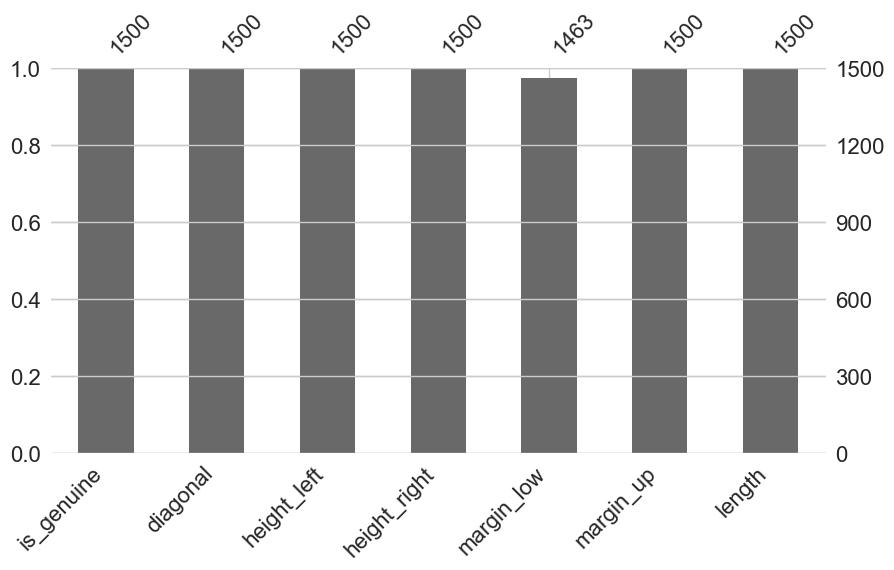

In [61]:
# A bar chart visualization of the nullity of the given DataFrame.
msno.bar(data, figsize=(10, 5));

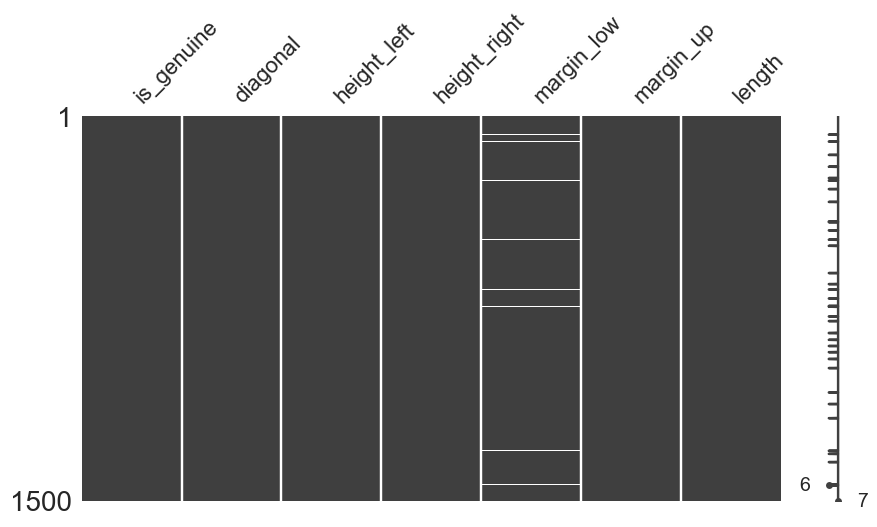

In [63]:
# A matrix visualization of the nullity of the given DataFrame (pick out patterns in data completion).

msno.matrix(data, figsize=(10, 5));

In [65]:
# Return a Series containing counts of unique values.

data.is_genuine.value_counts(dropna=False,  # If True, don't include counts of NaN.
                             normalize=False,  # If True then the object returned will contain the relative frequencies of the unique values.
                            )

is_genuine
True     1000
False     500
Name: count, dtype: int64

## Seaborn

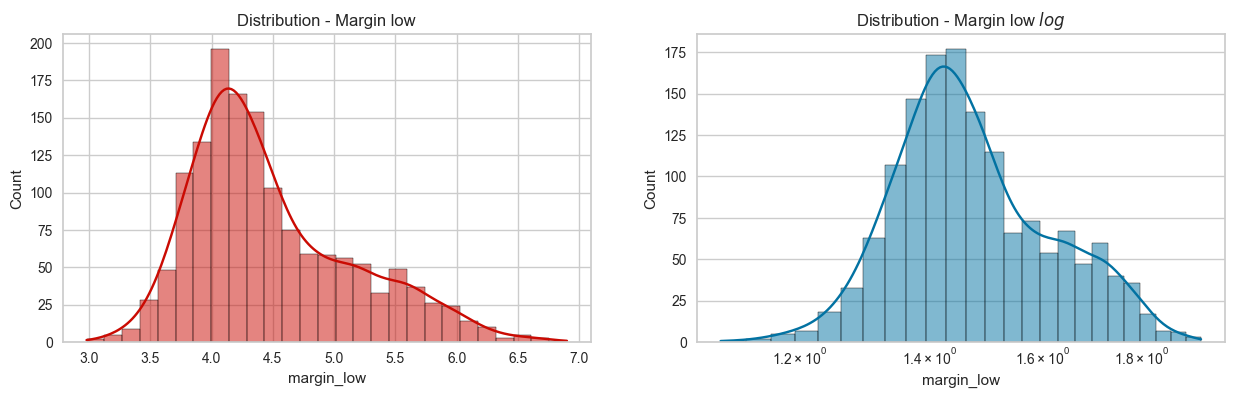

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.histplot(data["margin_low"], color='r', kde=True, ax=axes[0])
axes[0].set_title('Distribution - Margin low')

sns.histplot(np.log(data["margin_low"]), color='b', kde=True, ax=axes[1])
axes[1].set_title('Distribution - Margin low $log$')
axes[1].set_xscale('log');

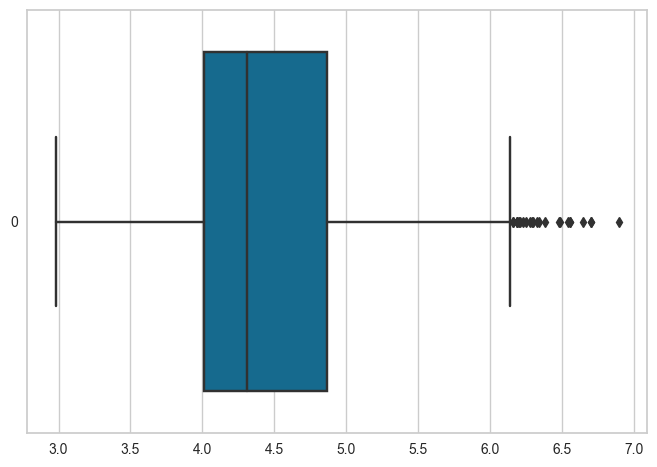

In [29]:
sns.boxplot(data["margin_low"], orient="h");

C:\Users\user\AppData\Local\Temp\ipykernel_27836\1199404445.py:7: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  data.boxplot(column=num_columns, by="is_genuine", ax=ax, grid=False,);


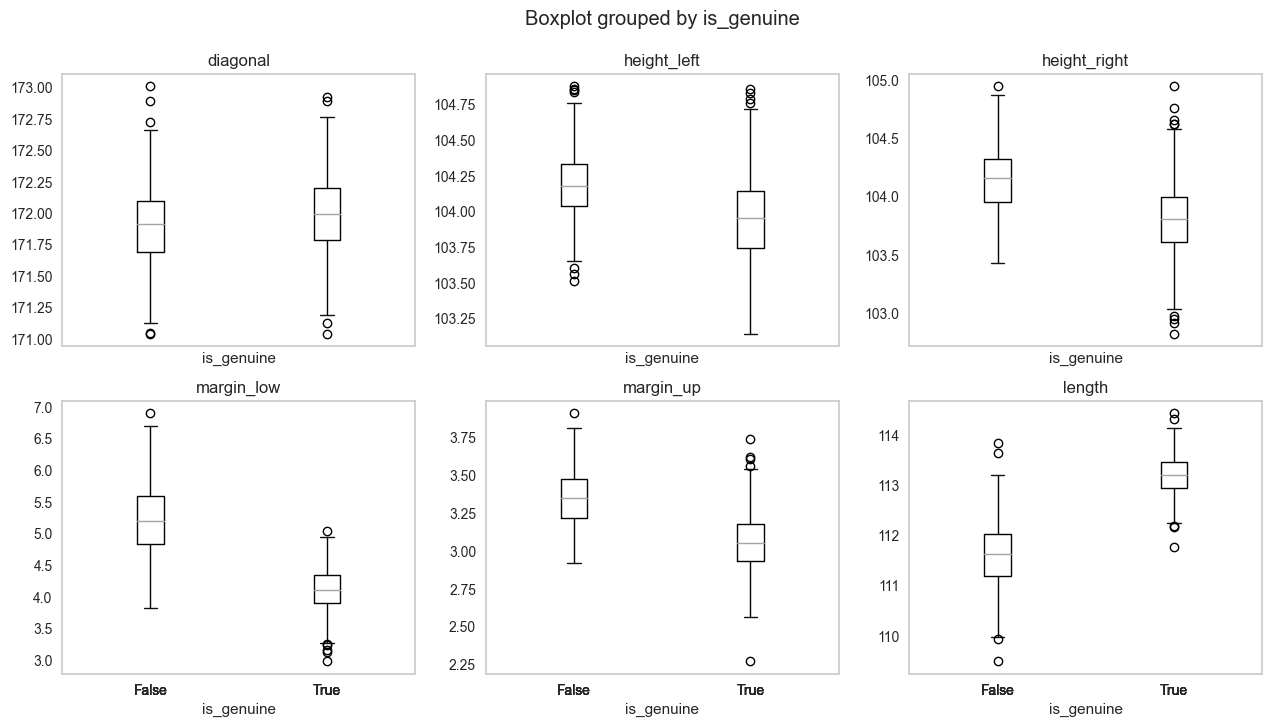

In [69]:
# distribution en fonction du type de billet (Faux vs Vrai)

num_columns = list(data.select_dtypes(include=[int, float]).columns) # extraction des colonnes numériques/décimales
# définition des caratéritiques de graph
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharey=False, sharex=True)
# box plot
data.boxplot(column=num_columns, by="is_genuine", ax=ax, grid=False,);

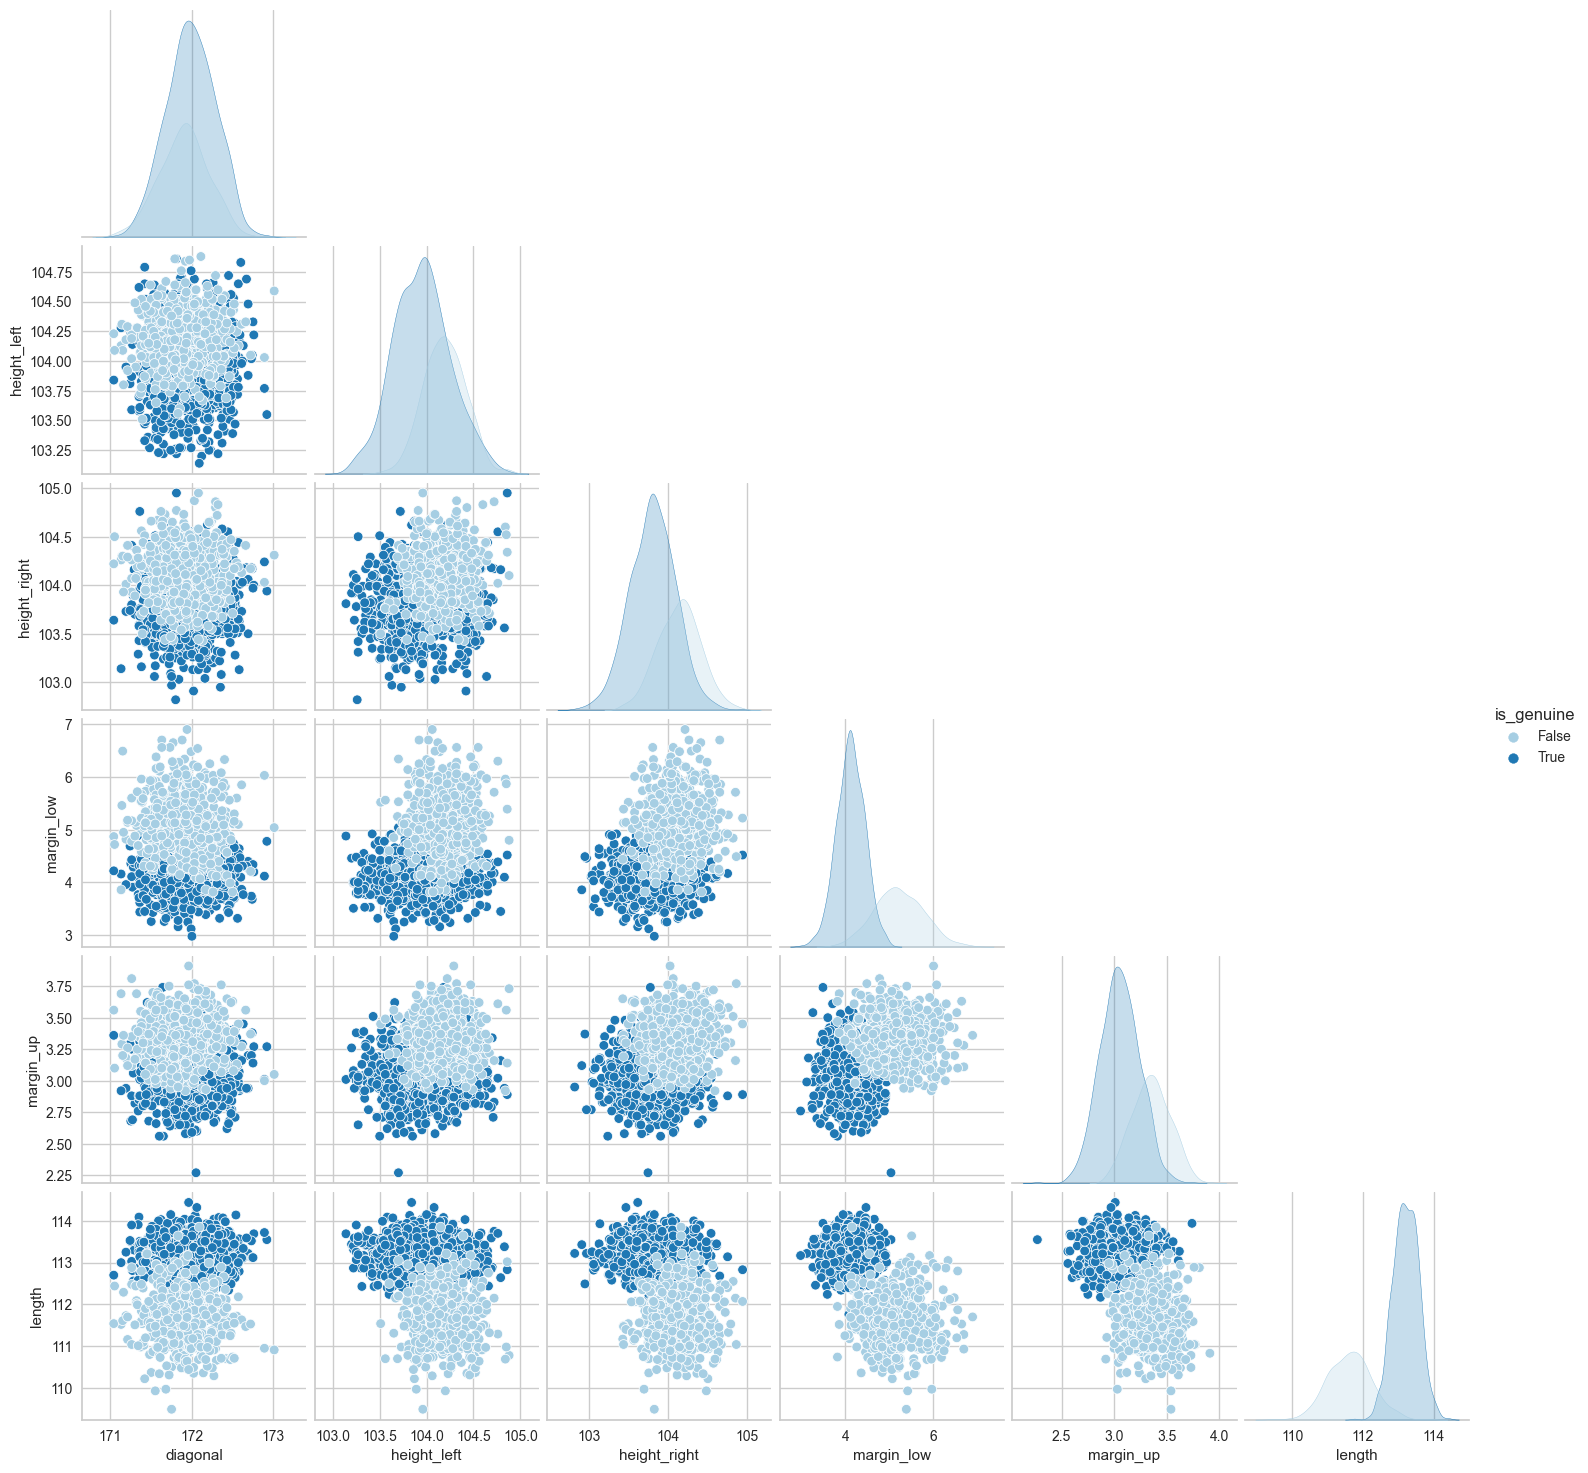

In [71]:
sns.pairplot(data, hue="is_genuine", palette="Paired", corner=True, diag_kind="kde");

## Plotly

In [85]:
px.scatter_matrix(data,
                  color="is_genuine",
                  width=None,
                  height=800,)

AttributeError: 'DataFrame' object has no attribute 'iteritems'

## Corrélation

In [87]:
data.select_dtypes(include=[int, float]).corr(method="pearson")

diagonal  height_left  height_right  margin_low  margin_up  \
diagonal      1.000000     0.019472     -0.024492   -0.111534  -0.055649   
height_left   0.019472     1.000000      0.242279    0.302643   0.246522   
height_right -0.024492     0.242279      1.000000    0.391085   0.307005   
margin_low   -0.111534     0.302643      0.391085    1.000000   0.431606   
margin_up    -0.055649     0.246522      0.307005    0.431606   1.000000   
length        0.097587    -0.320863     -0.401751   -0.666753  -0.520575   

                length  
diagonal      0.097587  
height_left  -0.320863  
height_right -0.401751  
margin_low   -0.666753  
margin_up    -0.520575  
length        1.000000

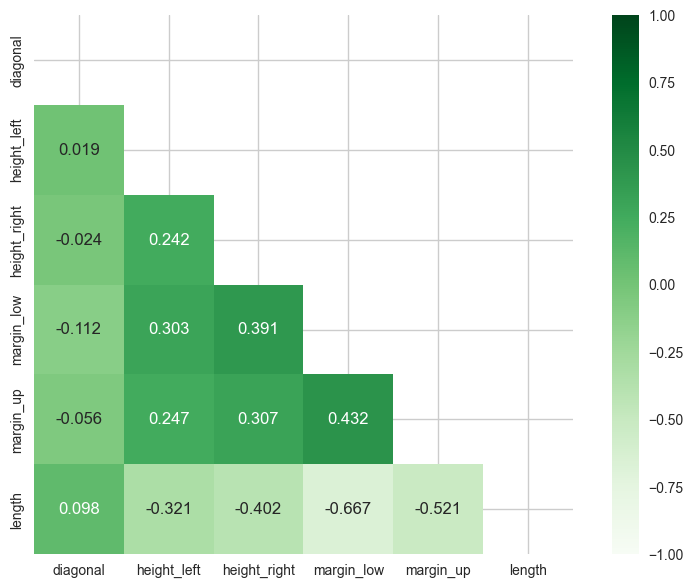

In [89]:
# correlation plot
plt.figure(figsize=(10, 7))
corr = data.select_dtypes(include=[int, float]).corr(method="pearson")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap='Greens', annot=True, square=True,
            fmt='.3f',
            mask=mask,
            cbar=True, vmin=-1, vmax=1);

## Profiling report

In [35]:
prf.__version__

NameError: name 'prf' is not defined

In [37]:
# Generate a profile report from a Dataset stored as a pandas `DataFrame`.

profile = ProfileReport(data, title="Profiling Report")
profile.to_notebook_iframe()  # Used to output the HTML representation to a Jupyter notebook.
# profile.to_file("data_report.html")  # Write the report to a file.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
profile.to_file("data_report.html")  # Write the report to a file.

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Modeling

In [91]:
from sklearn import linear_model

import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.diagnostic import het_white , normal_ad

La variable cible ne doit par avoir de valeurs nulles car il est impossible qu'on billet ne puisse pas avoir de margin_low. Donc, nous allons entrainer et évaluer le modèles sur l'ensemble des données complété à 100%.

Dans ce jeu de données, la seule variable ayant des valeurs manquantes est `margin_low` alors on va faire le filter des valeurs nulles, comme suit:

In [93]:
data_model = data.loc[lambda dfr: dfr.margin_low.notnull()]
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


In [95]:
# Création des variables explicatives et cible:
# X est la liste des variables explicatives et y est la variable cible
X = data_model.loc[:, ["diagonal", "height_left", "height_right", "margin_up", "length"]]  # ou data.drop(["margin_low", "is_genuine"], axis=1)
y = data_model.loc[:, 'margin_low']

In [97]:
X.head()

diagonal  height_left  height_right  margin_up  length
0    171.81       104.86        104.95       2.89  112.83
1    171.46       103.36        103.66       2.99  113.09
2    172.69       104.48        103.50       2.94  113.16
3    171.36       103.91        103.94       3.01  113.51
4    171.73       104.28        103.46       3.48  112.54

In [99]:
y.head()

0    4.52
1    3.77
2    4.40
3    3.62
4    4.04
Name: margin_low, dtype: float64

## Train / Test split

In [101]:
# Séparons nos données en un jeu d'entraînement et un jeu de test :
# 30% des données dans le jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train set - X: {X_train.shape} ; y: {y_train.shape} \nTest set - X: {X_test.shape} ; y: {y_test.shape}")

Train set - X: (1024, 5) ; y: (1024,) 
Test set - X: (439, 5) ; y: (439,)


## Standardisation

In [103]:
# Standardisons les données :

std_scaler = StandardScaler().fit(X_train)  # Standardize features by removing the mean and scaling to unit variance.
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [105]:
X_train

diagonal  height_left  height_right  margin_up  length
1243    171.64       104.20        104.10       3.60  112.72
1348    171.84       104.32        104.50       3.00  111.06
137     171.60       104.02        103.90       3.15  113.15
607     171.91       104.17        103.62       2.89  112.73
1198    172.05       104.20        104.11       3.37  111.18
...        ...          ...           ...        ...     ...
1161    171.92       104.29        104.27       3.13  111.37
1328    172.10       104.22        103.99       3.24  111.94
884     172.57       103.78        103.65       3.04  113.00
1496    172.19       104.63        104.44       3.37  110.97
1157    172.09       103.70        104.27       3.51  112.20

[1024 rows x 5 columns]

In [107]:
X_train_std

array([[-1.07074174,  0.5462928 ,  0.54806196,  1.91843401,  0.05088625],
       [-0.40647448,  0.94600971,  1.77308884, -0.68168479, -1.8514336 ],
       [-1.20359519, -0.05328258, -0.06445149, -0.03165509,  0.54365585],
       ...,
       [ 2.01810103, -0.85271641, -0.83009329, -0.50834354,  0.37175948],
       [ 0.75599323,  1.97861174,  1.58933481,  0.9217218 , -1.95457142],
       [ 0.4238596 , -1.11919435,  1.06869838,  1.52841619, -0.54502117]])

## Linear regression

In [109]:
# On crée un modèle de régression linéaire
lr = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(X_train, y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
lr_error = np.mean((lr.predict(X_test) - y_test) ** 2)

# On obtient l'erreur quadratique ci-dessous
print(lr_error)

0.2162452401635449


In [119]:
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)

Intercept: 18.871015985107086
Coefficients: [-0.08786741  0.1766823   0.26036458  0.28827054 -0.40492494]


### Validation du modèle

In [111]:
# Instanciation:
reg_lin = smf.ols("margin_low ~ diagonal + height_left + height_right + margin_up + length", data=data_model)

# Calculs:
res_lin = reg_lin.fit()
res_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Tue, 12 Nov 2024   Prob (F-statistic):          2.60e-202
Time:                        20:07:13   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382      0.017       4.055      41.935
diagonal        -0.1111      0.041     -2.680      0.007      -0.192      -0.030
height_left      0.1841      0.045      4.113      0.000       0.096       0.272
height_right     0.2571      0.043      5.978      0.000       0.173       0.342
margin_up        0.2562      0.064      3.980      0.000       0.130       0.382
length          -0.4091      0.018    -22.627      0.000      -0.445      -0.374
==============================================================================
Omnibus:                       73.627   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.862
Skew:                           0.482   Prob(JB):                     1.53e-21
Kurtosis:                       3.801   Cond. No.                     1.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Prediction

In [113]:
import matplotlib.pyplot as plt

In [115]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

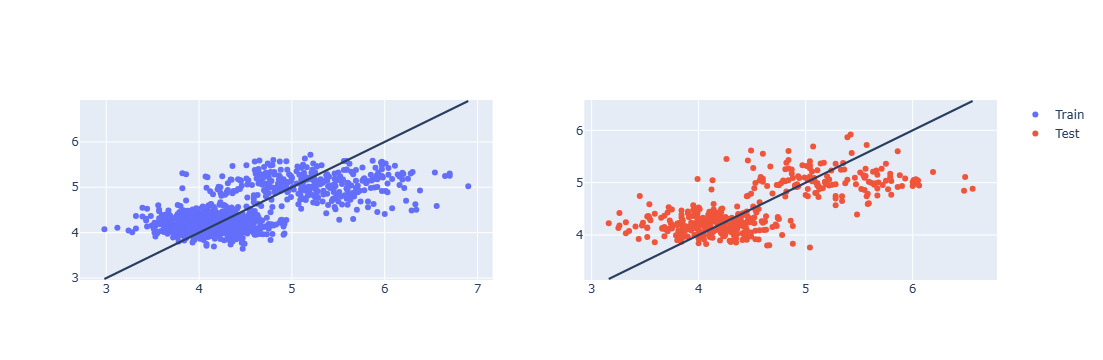

In [117]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=False)

for idx, (name, y_true, y_pred) in enumerate([("Train", y_train, y_train_pred),
                                              ("Test", y_test, y_test_pred),
                                             ]):
    col = idx + 1
    fig.add_trace(go.Scatter(x=y_true, y=y_pred, mode="markers", name=name), row=1, col=col)

    fig.add_shape(type="line",
              x0=y_true.min(), x1=y_true.max(),
              y0=y_true.min(), y1=y_true.max(),
              row=1, col=col)
    
fig.show()

### Analyse des résidus

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



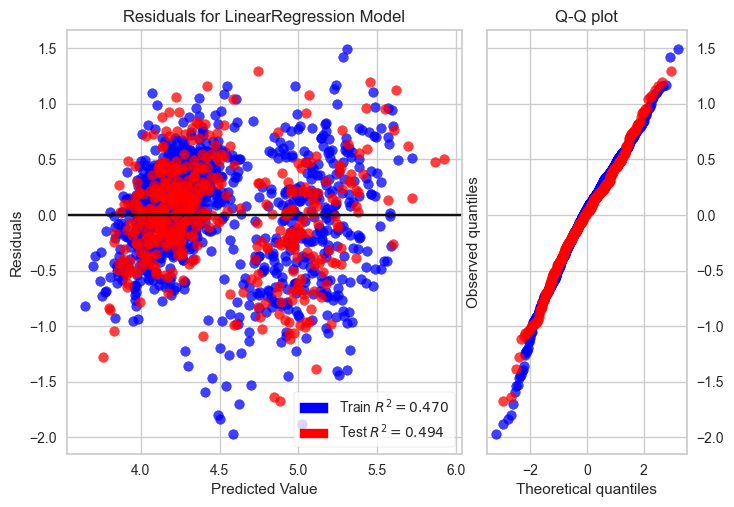

<Figure size 800x550 with 0 Axes>

In [119]:
res_viz = ResidualsPlot(lr,
                        is_fitted="auto",
                        qqplot=True,
                        hist=False,
                        train_color="blue",
                        test_color="red",
                       )
res_viz.fit(X_train, y_train)
res_viz.score(X_test, y_test)
res_viz.show(clear_figure=True);

### Test d'hypothèses

In [121]:
# La moyenne des residus est:
res_lin.resid.mean()

-7.231702895056659e-15

#### Normalité


Une `p-value < alpha` (5%, en général) pour le test d'Anderson-Darling indique que l'hypothèse nulle de normalité de la distribution des résidus est rejetée.



In [123]:
# Normalite:
print("La p-value du test d'Aderson-Darling vaux", normal_ad(res_lin.resid)[1])

La p-value du test d'Aderson-Darling vaux 5.114137678791534e-12


Ici, l'hypothèse H0 est rejetée puisque la p-value obtenue est inférieure à 5% (ou 1%), les résidus ne suivent pas une distribution Normale.

#### Homoscedasticite

**Test de White**
- L'hypothèse nulle (H0): est qu'il y a homoscédasticité (les résidus sont dispersés aléatoirement, la variance d'un individu à un autre est constante)
- L'hypothèse alternative (H1): est qu'il y a hétéroscédasticité.



In [137]:
# Homoscedasticite:
white_test = het_white(res_lin.resid, res_lin.model.exog)
labels_white_test = ["Test Statistic", "p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels_white_test, white_test)))

{'Test Statistic': 109.86015196908112, 'p-value': 2.0828244986129293e-14, 'F-Statistic': 5.85373120782543, 'F-Test p-value': 4.974865091759815e-15}


On fixe un seuil alpha de 5 %, la p-value est ici très inférieure au seuil, on ne peut pas accepter l'hypothèse nulle d'homoscédasticité. L'hypothèse d'homoscédasticité de notre régression linéaire est donc considérée comme vérifiée au risque alpha 5%.

#### Multicolinéarité

La multicolinéarité se produit lorsque les variables indépendantes sont trop fortement corrélées entre elles.

Le facteur d'inflation de la variance VIF* identifie la corrélation entre les variables indépendantes et la force de cette corrélation. [Si VIF >1 & VIF <5 corrélation modérée, VIF > 5 niveau critique de multicollinéarité.

In [125]:
# Check for Multicollinearity
# Variance Inflation Factor (VIF)
r_square_test = metrics.mean_squared_error(y_test, lr.predict(X_test), squared=True)
vif = 1 / (1 - r_square_test)
vif

1.2759093165937114

## Ridge

Comme vu dans le chapitre sur la régression ridge, on doit trouver un coefficient de régularisation adapté. Pour rappel, l'objectif est de biaiser un peu la prédiction, afin de diminuer l'erreur standard. 

On appelle ce coefficient alpha, on va en tester `alpha=1.`


In [127]:
# On crée un modèle de régression linéaire
ridge = linear_model.Ridge(alpha=1.)

# On entraîne ce modèle sur les données d'entrainement
ridge.fit(X_train, y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test
ridge_error = np.mean((ridge.predict(X_test) - y_test) ** 2)


# On obtient l'erreur quadratique ci-dessous
print(ridge_error)

0.2162136226425013


In [129]:
mse = metrics.mean_squared_error(ridge.predict(X_test), y_test)
rmse = np.sqrt(mse)  # metrics.mean_squared_error(ridge.predict(X_test), y_test, squared=False)
mae = metrics.mean_absolute_error(ridge.predict(X_test), y_test)

mse, rmse, mae

(0.2162136226425013, 0.46498776612132636, 0.3562931945556513)

## Définition d'une fonction d'entrainement

In [131]:
def train_model(model, x_train, y_train, x_test, y_test):
    # On entraîne ce modèle sur les données d'entrainement
    model.fit(x_train, y_train)
    
    # On récupère l'erreur de norme 2 sur le jeu de données train
    error_train = np.mean((model.predict(x_train) - y_train) ** 2)

    # On récupère l'erreur de norme 2 sur le jeu de données test
    error_test = np.mean((model.predict(x_test) - y_test) ** 2)

    # On obtient l'erreur quadratique ci-dessous
    print(f"Model error: {round(error_test, 5)}")
    return {"estimator": model, "error_train": error_train, "error_test": error_test}

In [133]:
# Train and evaluate ridge regression
ridge_mse = train_model(model=linear_model.Ridge(alpha=1.),
                          x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test)

Model error: 0.21621


## Lasso

In [135]:
# Train and evaluate ridge regression
lasso_error = train_model(model=linear_model.Lasso(fit_intercept=True, alpha=1.,),
                          x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test)

Model error: 0.42698


## Elastic-Net

In [137]:
# Train and evaluate ridge regression
elastic_error = train_model(model=linear_model.ElasticNet(fit_intercept=True, alpha=1., l1_ratio=.5),
                            x_train=X_train_std, y_train=y_train,
                            x_test=X_test, y_test=y_test)


Model error: 0.42698


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but ElasticNet was fitted without feature names



### Exercice:

Dans la cellule précédente, veuillez analyser les variables explicatives: que constatez vous entre le jeu de train et le jeu de test?

## Pipeline

Dans la plupart des projets de Machine Learning, le **jeu de données** utilisé pour calibrer le modèle doit **subir toute une série de transformations**. Encodage de variables catégorielles, de la normalisation, du feature scaling et autres techniques spécifiques.

Cependant, cette **série de transformations** doit ****être appliquée** plus d'une fois. D'une part, au moment où il faut **entraîner le modèle**, et d'autre part lorsqu'il faut **obtenir une prédiction** pour de nouvelles données. Comment **ne pas mélanger les différentes étapes** et **garantir un traitement consistant entre ces deux étapes** ? C'est tout l'**intérêt des pipelines** de scikit-learn. Ces pipelines vont résoudre un certain nombre de problèmes.

1. **Facilité d'utilisation** : Les pipelines de sklearn simplifient la création et la gestion des workflows de machine learning en regroupant plusieurs étapes de prétraitement des données et de modélisation dans une seule structure. Cela facilite le processus de développement et de déploiement des modèles. Toutes les opérations de transformations vont être centralisées dans le pipeline.

2. **Organisation du code** : Les pipelines permettent d'organiser le code de manière claire et cohérente. Chaque étape du pipeline est définie comme une étape distincte, ce qui facilite la compréhension, la maintenance et le partage du code avec d'autres développeurs. Il sera plus facile d'intégrer ce pipelines à plusieurs endroits dans le code source.

3. **Prétraitement cohérent** : Les pipelines garantissent que les étapes de prétraitement des données sont appliquées de manière cohérente sur l'ensemble des données, y compris sur les données de validation et de test. Cela évite les erreurs courantes telles que le prétraitement des données d'entraînement et de test de manière indépendante, ce qui peut entraîner un biais dans l'évaluation du modèle.

4. **Prévention des fuites de données** : Les pipelines aident à prévenir les fuites de données en s'assurant que les étapes de prétraitement des données sont exécutées à l'intérieur de chaque pli de validation croisée lors de l'évaluation du modèle. Cela garantit que les informations des données de test ne "fuient" pas dans le processus de prétraitement.


Pour illustrer les pipelines de scikit-learn, nous allons utiliser le jeu de données suivant.

In [139]:
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn import set_config

set_config(display="diagram", print_changed_only=True)

In [141]:
# définition de Pipeline de régression avec Pipeline (c'est à nous de données les noms de chaque étape du workflow)
reg_pipe = Pipeline(steps=[("scaler", MinMaxScaler()),
                           ("regressor", linear_model.LinearRegression()),
                          ]
                   )
# ou via make_pipeline (la seule différence est que make_pipeline génère automatiquement des noms pour les étapes).
# reg_pipe = make_pipeline(StandardScaler(), linear_model.LinearRegression())
reg_pipe

Pipeline(steps=[('scaler', MinMaxScaler()), ('regressor', LinearRegression())])

**Les Transformers**

Un Transformer est un objet scikit-learn qui permet d'appliquer une transformation (encodage, normalisation, ...) sur un DataFrame. L'intérêt du Transformer est double.

Pouvoir définir une méthode de transformation sur-mesure.
Pouvoir appliquer cette méthode sur un DataFrame quelconque.

**Les estimators**

Une fois que le pipeline de preprocessing (Transformer) est en place, nous pouvons ajouter la couche prédictive, qui ici est un modèle de regression.

La particularité, c'est que la variable `reg_pipe` n'est pas uniquement le modèle, mais renferme également les étapes de preprocessing que nous appliquons aux données.

Ainsi, qu'il s'agisse d'un `fit` ou d'un `predict`, les données subiront les étapes du preprocessing au préalable.

In [143]:
# Train and evaluate ridge regression
lr_results = train_model(model=reg_pipe,
                       x_train=X_train, y_train=y_train,
                       x_test=X_test, y_test=y_test)

lr_pipe = lr_results["estimator"]

Model error: 0.21625


In [131]:
### Métriques d'évaluation

In [145]:
def get_all_performances(value_train: tuple,
                         values_test: tuple,
                         metrics: list,
                        ) -> pd.DataFrame:
    """ Get all performance metrics listed in `metrics`
    
    Args:
        value_train (tuple): (y_train, y_train_pred)
        values_test (tuple): (y_test, y_test_pred)
        metrics (list): list of metrics to compute
    
    
    Returns:
        pd.DataFrame: column names are: ["metric", "train", "test"]
        
    """
    test_perfs = []
    train_perfs = []
    metric_names = []
    for metric_func in metrics:
        metric_name = metric_func.__name__
        metric_names.append(metric_name)
        train_perfs.append(metric_func(*value_train))
        test_perfs.append(metric_func(*values_test))
    perfs = {"metric": metric_names, "train": train_perfs, "test": test_perfs,}
    return pd.DataFrame(perfs)

In [147]:
METRICS = [metrics.r2_score,
           metrics.mean_squared_error,
           metrics.mean_absolute_percentage_error,
           metrics.max_error,
          ]

In [149]:
# get performances in train & test
get_all_performances(value_train=(y_train, lr_pipe.predict(X_train)),
                     values_test=(y_test, lr_pipe.predict(X_test)),
                     metrics=METRICS
                    )

metric     train      test
0                        r2_score  0.470372  0.493529
1              mean_squared_error  0.236255  0.216245
2  mean_absolute_percentage_error  0.083693  0.079420
3                       max_error  1.975055  1.674400

## Validation croisée

La validation croisée (cross-validation en anglais) est une technique essentielle en machine learning pour évaluer les performances d'un modèle de manière robuste. Elle vise à estimer la capacité de généralisation d'un modèle sur des données non vues, en simulant des situations où le modèle est confronté à de nouveaux exemples.

La validation croisée permet d'obtenir une estimation plus fiable des performances du modèle en évaluant sa capacité à généraliser sur plusieurs partitions des données d'entraînement. Cela aide à éviter le surajustement (overfitting) du modèle à un ensemble de données spécifique et fournit une meilleure indication de ses performances réelles sur des données inconnues.

Voici les étapes générales de la validation croisée :

<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width="400">


Avec sklearn, vous pouvez mettre en place la validation croisée avec le module `sklearn.model_selection`


Voici un exemple de procédure pour mettre en oeuvre la validation croisée et la recherche de smeilleurs hyperparamètres.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="500">

In [135]:
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict, GridSearchCV

In [151]:
# Pour lister les noms des métriques à fournir à scoring, vous pouvez consulter le site de sklearn ou 
# éxecuter dans une cellule de code: sklearn.metrics.SCORERS.
# Avec cross_validation, il est possible d'optimiser le modèle avec plusieurs métriques d'évaluation.
from sklearn.model_selection import cross_validate

scores = cross_validate(reg_pipe, X_train, y_train, cv=5,
                        scoring=["r2"],  # ["r2", "neg_root_mean_squared_error"]
                        return_train_score=True,
                        verbose=True,
                       )
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00799489, 0.00599909, 0.00799584, 0.00899172, 0.00899482]),
 'score_time': array([0.00299788, 0.00099921, 0.00299788, 0.00299835, 0.00199842]),
 'test_r2': array([0.3807582 , 0.50415093, 0.47790462, 0.42193043, 0.51484226]),
 'train_r2': array([0.49122706, 0.46125203, 0.46426527, 0.4813997 , 0.458783  ])}

In [153]:
pd.DataFrame(scores)

fit_time  score_time   test_r2  train_r2
0  0.007995    0.002998  0.380758  0.491227
1  0.005999    0.000999  0.504151  0.461252
2  0.007996    0.002998  0.477905  0.464265
3  0.008992    0.002998  0.421930  0.481400
4  0.008995    0.001998  0.514842  0.458783

In [155]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg_pipe, X_train, y_train, cv=5, scoring="r2")

array([0.3807582 , 0.50415093, 0.47790462, 0.42193043, 0.51484226])

## Hyperparameters tuning

Le réglage des hyperparamètres (hyperparameter tuning en anglais) est une étape importante dans le développement de modèles de machine learning. Les hyperparamètres sont des paramètres qui ne sont pas appris par le modèle lui-même, mais qui doivent être spécifiés avant l'entraînement du modèle. Ils contrôlent le comportement et les performances du modèle.


Il est important de noter que le réglage des hyperparamètres est un processus itératif et peut nécessiter plusieurs itérations pour trouver la meilleure combinaison. Des techniques avancées telles que l'optimisation bayésienne (`optuna`, `hyperopt`, `sklearn`, `Tune`, `BayesianOptimization`), la recherche aléatoire (`RandomizedSearchCV`), les algorithmes génétiques, etc., peuvent également être utilisées pour explorer efficacement l'espace des hyperparamètres.

Nous allons, pour la suite, tester l'optimisation des hyperparamètres avec `sklearn`.

Voici quelques étapes générales pour le réglage des hyperparamètres :

1. **Sélection des hyperparamètres** : Tout d'abord, identifiez les hyperparamètres pertinents pour votre modèle. Cela dépendra du type de modèle que vous utilisez. Par exemple, pour un modèle de régression linéaire, le coefficient de régularisation (alpha) peut être un hyperparamètre important, tandis que pour un modèle de forêt aléatoire, le nombre d'arbres (n_estimators) et la profondeur maximale des arbres (max_depth) peuvent être des hyperparamètres clés.

2. **Définition de la grille de recherche** : Pour chaque hyperparamètre sélectionné, définissez une plage de valeurs possibles ou une liste de valeurs spécifiques à tester. Il est courant d'utiliser une approche de recherche par grille (grid search) où toutes les combinaisons possibles d'hyperparamètres sont évaluées. Cependant, d'autres méthodes d'optimisation, telles que l'optimisation bayésienne, peuvent également être utilisées.

3. **Évaluation des performances** : Définissez une métrique d'évaluation appropriée pour mesurer les performances du modèle, comme l'exactitude (accuracy), la précision (precision), le rappel (recall), le F-mesure (F1-score), etc. Cette métrique sera utilisée pour comparer les performances des modèles avec différents réglages d'hyperparamètres.

4. **Entraînement et évaluation des modèles** : Pour chaque combinaison d'hyperparamètres dans la grille de recherche, entraînez le modèle sur les données d'entraînement et évaluez ses performances sur les données de validation à l'aide de la métrique d'évaluation choisie. Ceci est généralement fait en utilisant la validation croisée (cross-validation) pour obtenir une estimation plus fiable des performances.

5. **Sélection des meilleurs hyperparamètres** : Une fois que tous les modèles ont été évalués, comparez les performances et identifiez la combinaison d'hyperparamètres qui donne les meilleurs résultats selon la métrique d'évaluation choisie. C'est cette combinaison qui sera utilisée comme les hyperparamètres finaux pour le modèle.

6. **Test final et évaluation** : Une fois que vous avez sélectionné les meilleurs hyperparamètres, entraînez le modèle sur l'ensemble des données d'entraînement, y compris les données de validation, et évaluez-le sur un ensemble de test indépendant pour obtenir une estimation finale de ses performances.

In [157]:
reg_pipe

Pipeline(steps=[('scaler', MinMaxScaler()), ('regressor', LinearRegression())])

In [159]:
reg_pipe.named_steps

{'scaler': MinMaxScaler(), 'regressor': LinearRegression()}

In [161]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "regressor__fit_intercept": [True, False],
}

grid_search = GridSearchCV(reg_pipe, param_grid, cv=10, scoring="r2", return_train_score=True)
grid_search

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [163]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")


Best params: {'regressor__fit_intercept': True}


In [165]:
print(f"Internal CV score: {grid_search.best_score_: .3f}")

Internal CV score:  0.457


In [167]:
grid_cv_results = grid_search.cv_results_

In [169]:
pd.DataFrame(grid_cv_results)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.006297      0.001845         0.002698         0.00064   
1       0.005497      0.001117         0.002299         0.00064   

  param_regressor__fit_intercept                               params  \
0                           True   {'regressor__fit_intercept': True}   
1                          False  {'regressor__fit_intercept': False}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.324875           0.455784           0.440131           0.496866   
1          -0.238620          -0.633217          -0.509765          -0.141505   

   ...  split2_train_score  split3_train_score  split4_train_score  \
0  ...            0.470914            0.465793            0.464958   
1  ...           -0.365767           -0.405348           -0.369625   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.466923            0.478213            0.471587   
1           -0.370102           -0.345983           -0.393245   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            0.459606            0.470418          0.470702         0.007262  
1           -0.427151           -0.377242         -0.380330         0.022750  

[2 rows x 31 columns]

## Importance des variables

In [171]:
grid_search.predict(X_test)

array([4.96952674, 4.30554166, 4.37300759, 4.08410376, 4.00749652,
       4.09511292, 4.86098204, 4.12242255, 4.19436321, 3.84083019,
       5.15347379, 4.13702967, 4.44730181, 4.07859353, 5.920232  ,
       4.10265579, 4.13509451, 3.95720873, 4.16453648, 5.11052755,
       4.22849691, 4.78867524, 5.01414919, 4.0989596 , 4.06903696,
       3.99708914, 4.17333833, 4.09592705, 4.92466552, 4.2389451 ,
       5.10135736, 4.14792   , 4.49804141, 4.19250348, 3.98443957,
       4.1826303 , 3.97669416, 5.60052731, 5.71876094, 4.14653594,
       4.26224931, 4.39721242, 4.7907356 , 4.46894664, 5.36203199,
       4.41841805, 4.74113627, 4.94734046, 4.25907858, 4.72398858,
       4.27997822, 4.20962232, 3.93052514, 4.10759606, 4.33554249,
       4.20132988, 4.15349393, 4.38069341, 4.16378971, 5.37982479,
       3.82908575, 4.98917266, 4.04594039, 4.29535145, 4.56923662,
       4.25544661, 3.8982783 , 5.26665224, 5.23638346, 3.97895929,
       4.91737895, 4.37956553, 5.09650965, 4.25841065, 4.01899

In [173]:
df_feature_importance = pd.DataFrame(reg_pipe[-1].coef_, columns=["coef"], index=grid_search.feature_names_in_)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance.head()

Shape: (5, 1)


coef
diagonal     -0.161676
height_left   0.293293
height_right  0.531144
margin_up     0.389165
length       -1.761424

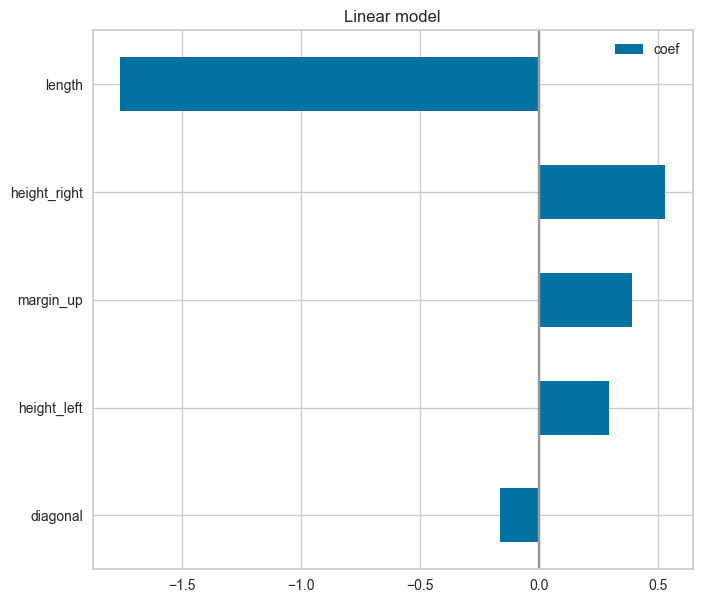

In [175]:
# top30 most important features
(df_feature_importance
 .sort_values("coef", key=lambda v: abs(v), ascending=True)
 .plot(kind="barh", figsize=(10, 7))
)
plt.title("Linear model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);


# TP1 Machine Learning

## Exercice 1

## Ridge
        


In [277]:
mse = metrics.mean_squared_error(ridge.predict(X_test), y_test)
rmse = np.sqrt(mse)  # metrics.mean_squared_error(ridge.predict(X_test), y_test, squared=False)
mae = metrics.mean_absolute_error(ridge.predict(X_test), y_test)

mse, rmse, mae

(0.2162136226425013, 0.46498776612132636, 0.3562931945556513)

## Lasso

In [291]:
lasso = linear_model.Lasso(alpha=1.)
lasso.fit(X_train, y_train)

mse = metrics.mean_squared_error(lasso.predict(X_test), y_test)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(lasso.predict(X_test), y_test)

mse, rmse, mae

(0.42698000593598173, 0.6534370711369089, 0.5241622472949887)

## Elastic Net


In [295]:

elastic_net = linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5)  
elastic_net.fit(X_train, y_train)

y_pred = elastic_net.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_test, y_pred)

mse, rmse, mae

(0.42698000593598173, 0.6534370711369089, 0.5241622472949887)

## Exercice 2

## Optimisation des modèles Ridges et Lasso
      

# Ridge

In [181]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt


# Créer le pipeline Ridge
reg_ridge_pipe = Pipeline(steps=[
    ("scaler", MinMaxScaler()),
    ("regressor", Ridge())
])

# Définir la grille des hyperparamètres pour Ridge
param_grid_ridge = {
    "regressor__alpha": [0.001, 0.01, 0.1, 1, 10, 100],
    "regressor__fit_intercept": [True, False]
}

# Créer l'objet GridSearchCV pour Ridge
grid_search_ridge = GridSearchCV(reg_ridge_pipe, param_grid_ridge, cv=10, scoring="r2", return_train_score=True)

# Effectuer la recherche sur la grille pour Ridge
grid_search_ridge.fit(X_train, y_train)

# Afficher les meilleurs paramètres pour Ridge
print("Meilleurs paramètres pour Ridge:", grid_search_ridge.best_params_)
print("Meilleur score R2 pour Ridge:", grid_search_ridge.best_score_)

Meilleurs paramètres pour Ridge: {'regressor__alpha': 1, 'regressor__fit_intercept': True}
Meilleur score R2 pour Ridge: 0.45725848363021493


In [183]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt


# Créer le pipeline Ridge
reg_ridge_pipe = Pipeline(steps=[
    ("scaler", MinMaxScaler()),
    ("regressor", Ridge())
])

# Définir la grille des hyperparamètres pour Ridge
param_grid_ridge = {
    "regressor__alpha": [0.1, 0.2, 0.3, 0.5],
    "regressor__fit_intercept": [True, False]
}

# Créer l'objet GridSearchCV pour Ridge
grid_search_ridge = GridSearchCV(reg_ridge_pipe, param_grid_ridge, cv=10, scoring="r2", return_train_score=True)

# Effectuer la recherche sur la grille pour Ridge
grid_search_ridge.fit(X_train, y_train)

# Afficher les meilleurs paramètres pour Ridge
print("Meilleurs paramètres pour Ridge:", grid_search_ridge.best_params_)
print("Meilleur score R2 pour Ridge:", grid_search_ridge.best_score_)

Meilleurs paramètres pour Ridge: {'regressor__alpha': 0.5, 'regressor__fit_intercept': True}
Meilleur score R2 pour Ridge: 0.4572541369278687


## Generation des features de la régression Ridge

In [240]:
df_feature_importance = pd.DataFrame(grid_search_ridge.best_estimator_[-1].coef_, columns=["coef"], index=grid_search_ridge.feature_names_in_)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance.head()

Shape: (5, 1)


coef
diagonal     -0.160755
height_left   0.296077
height_right  0.529874
margin_up     0.398089
length       -1.735922

In [221]:
cv_results_df = pd.DataFrame(grid_search_ridge.cv_results_)
cv_results_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.004897      0.001043         0.002397        0.000488   
1       0.004797      0.000871         0.001902        0.000833   
2       0.004397      0.000799         0.001899        0.000538   
3       0.004998      0.001182         0.002398        0.000799   
4       0.004097      0.001043         0.001599        0.000490   
5       0.004098      0.001220         0.001699        0.000458   
6       0.003798      0.000748         0.001599        0.000663   
7       0.003797      0.000747         0.001699        0.000640   

  param_regressor__alpha param_regressor__fit_intercept  \
0                    0.1                           True   
1                    0.1                          False   
2                    0.2                           True   
3                    0.2                          False   
4                    0.3                           True   
5                    0.3                          False   
6                    0.5                           True   
7                    0.5                          False   

                                              params  split0_test_score  \
0  {'regressor__alpha': 0.1, 'regressor__fit_inte...           0.325504   
1  {'regressor__alpha': 0.1, 'regressor__fit_inte...          -0.238490   
2  {'regressor__alpha': 0.2, 'regressor__fit_inte...           0.326121   
3  {'regressor__alpha': 0.2, 'regressor__fit_inte...          -0.238367   
4  {'regressor__alpha': 0.3, 'regressor__fit_inte...           0.326724   
5  {'regressor__alpha': 0.3, 'regressor__fit_inte...          -0.238252   
6  {'regressor__alpha': 0.5, 'regressor__fit_inte...           0.327893   
7  {'regressor__alpha': 0.5, 'regressor__fit_inte...          -0.238044   

   split1_test_score  split2_test_score  ...  split2_train_score  \
0           0.455894           0.440122  ...            0.470912   
1          -0.632830          -0.510105  ...           -0.365769   
2           0.455998           0.440109  ...            0.470907   
3          -0.632449          -0.510445  ...           -0.365774   
4           0.456097           0.440091  ...            0.470897   
5          -0.632073          -0.510786  ...           -0.365784   
6           0.456277           0.440046  ...            0.470868   
7          -0.631339          -0.511466  ...           -0.365814   

   split3_train_score  split4_train_score  split5_train_score  \
0            0.465790            0.464956            0.466921   
1           -0.405350           -0.369627           -0.370104   
2            0.465784            0.464950            0.466914   
3           -0.405357           -0.369633           -0.370110   
4            0.465772            0.464939            0.466903   
5           -0.405368           -0.369642           -0.370120   
6            0.465737            0.464906            0.466869   
7           -0.405402           -0.369671           -0.370151   

   split6_train_score  split7_train_score  split8_train_score  \
0            0.478211            0.471585            0.459604   
1           -0.345985           -0.393247           -0.427153   
2            0.478205            0.471578            0.459600   
3           -0.345991           -0.393254           -0.427160   
4            0.478195            0.471567            0.459593   
5           -0.346000           -0.393265           -0.427171   
6            0.478163            0.471533            0.459570   
7           -0.346031           -0.393299           -0.427205   

   split9_train_score  mean_train_score  std_train_score  
0            0.470416          0.470700         0.007262  
1           -0.377244         -0.380332         0.022750  
2            0.470409          0.470693         0.007261  
3           -0.377251         -0.380338         0.022751  
4            0.470398          0.470683         0.007260  
5           -0.377262         -0.380349         0.02

## Importance des variables

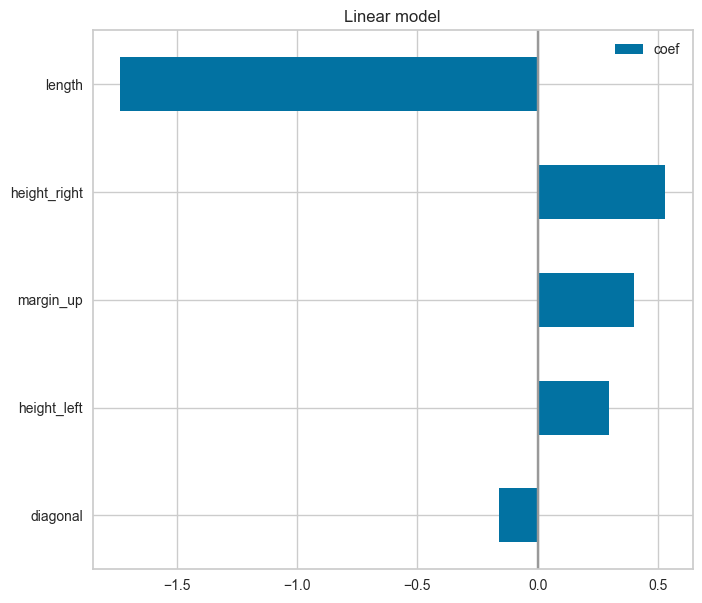

In [242]:
# top30 most important features
(df_feature_importance
 .sort_values("coef", key=lambda v: abs(v), ascending=True)
 .plot(kind="barh", figsize=(10, 7))
)
plt.title("Linear model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);


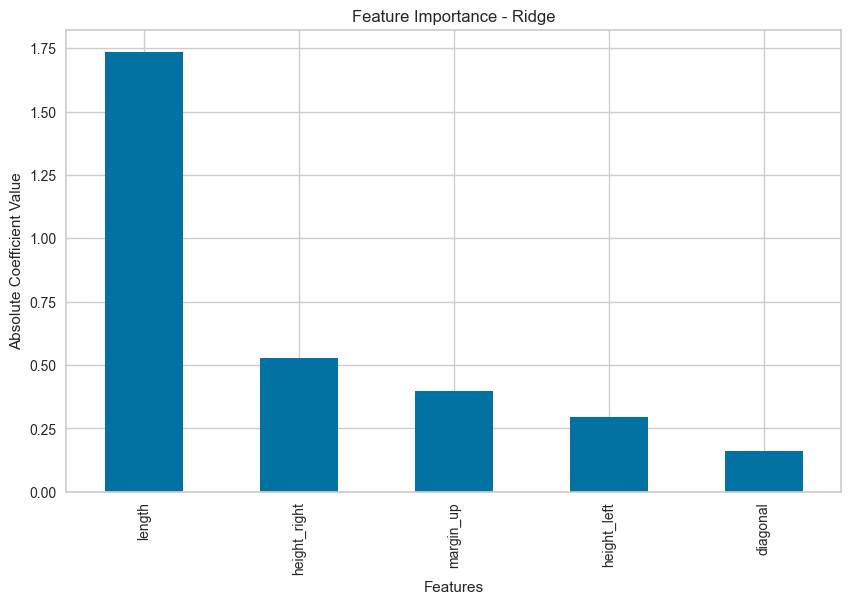

In [227]:
import matplotlib.pyplot as plt

# Visualisation des coefficients pour Ridge
plt.figure(figsize=(10, 6))
ridge_coef_sorted.plot(kind='bar')
plt.title('Feature Importance - Ridge')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.show()


# Lasso

In [256]:
# Créer le pipeline Lasso
reg_lasso_pipe = Pipeline(steps=[
    ("scaler", MinMaxScaler()),
    ("regressor", Lasso())
])

# Définir la grille des hyperparamètres pour Lasso
param_grid_lasso = {
    "regressor__alpha":[0.001, 0.01, 0.1, 1, 10, 100] ,
    "regressor__fit_intercept": [True, False]
}

# Créer l'objet GridSearchCV pour Lasso
grid_search_lasso = GridSearchCV(reg_lasso_pipe, param_grid_lasso, cv=10, scoring="r2", return_train_score=True)

# Effectuer la recherche sur la grille pour Lasso
grid_search_lasso.fit(X_train, y_train)

best_lasso_model = grid_search_lasso.best_estimator_.named_steps['regressor']
lasso_coef = pd.Series(best_lasso_model.coef_, index=X_train.columns)
lasso_coef_sorted = lasso_coef.abs().sort_values(ascending=False)

# Afficher les meilleurs paramètres pour Lasso
print("\nMeilleurs paramètres pour Lasso:", grid_search_lasso.best_params_)
print("Meilleur score R2 pour Lasso:", grid_search_lasso.best_score_)


Meilleurs paramètres pour Lasso: {'regressor__alpha': 0.001, 'regressor__fit_intercept': True}
Meilleur score R2 pour Lasso: 0.45690245395543594


## Generation des features de la régression Lasso

In [246]:
# Générer la feature importance pour Lasso
df_feature_importance = pd.DataFrame(grid_search_lasso.best_estimator_[-1].coef_, columns=["coef"], index=grid_search_lasso.feature_names_in_)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance.head()

Shape: (5, 1)


coef
diagonal     -0.125858
height_left   0.272850
height_right  0.504534
margin_up     0.369638
length       -1.761982

In [248]:
cv_results_df = pd.DataFrame(grid_search_lasso.cv_results_)
cv_results_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.005696      0.001009         0.002201        0.001081   
1        0.004697      0.001186         0.001899        0.000830   
2        0.004098      0.000541         0.001699        0.000640   
3        0.005099      0.001135         0.002297        0.000638   
4        0.003998      0.000774         0.001699        0.000640   
5        0.004795      0.001077         0.001699        0.000640   
6        0.004196      0.002039         0.001799        0.000602   
7        0.003898      0.001041         0.001898        0.000695   
8        0.003501      0.000668         0.001398        0.000488   
9        0.003198      0.000600         0.001399        0.000490   
10       0.003198      0.000399         0.001799        0.000599   
11       0.003498      0.000808         0.002202        0.002322   

   param_regressor__alpha param_regressor__fit_intercept  \
0                   0.001                           True   
1                   0.001                          False   
2                    0.01                           True   
3                    0.01                          False   
4                     0.1                           True   
5                     0.1                          False   
6                       1                           True   
7                       1                          False   
8                      10                           True   
9                      10                          False   
10                    100                           True   
11                    100                          False   

                                               params  split0_test_score  \
0   {'regressor__alpha': 0.001, 'regressor__fit_in...           0.322070   
1   {'regressor__alpha': 0.001, 'regressor__fit_in...          -0.239155   
2   {'regressor__alpha': 0.01, 'regressor__fit_int...           0.295796   
3   {'regressor__alpha': 0.01, 'regressor__fit_int...          -0.245735   
4   {'regressor__alpha': 0.1, 'regressor__fit_inte...          -0.004659   
5   {'regressor__alpha': 0.1, 'regressor__fit_inte...          -0.395905   
6   {'regressor__alpha': 1, 'regressor__fit_interc...          -0.004659   
7   {'regressor__alpha': 1, 'regressor__fit_interc...          -9.251155   
8   {'regressor__alpha': 10, 'regressor__fit_inter...          -0.004659   
9   {'regressor__alpha': 10, 'regressor__fit_inter...         -41.861013   
10  {'regressor__alpha': 100, 'regressor__fit_inte...          -0.004659   
11  {'regressor__alpha': 100, 'regressor__fit_inte...         -41.861013   

    split1_test_score  split2_test_score  ...  split2_train_score  \
0            0.454557           0.439733  ...            0.470688   
1           -0.632364          -0.508495  ...           -0.365778   
2            0.433903           0.426596  ...            0.454842   
3           -0.625020          -0.500198  ...           -0.366876   
4           -0.004333          -0.043334  ...            0.000000   
5           -0.660389          -0.513486  ...           -0.477311   
6           -0.004333          -0.043334  ...            0.000000   
7          -10.644437          -9.161669  ...           -9.977782   
8           -0.004333          -0.043334  ...            0.000000   
9          -45.836269         -48.244536  ...          -44.956114   
10          -0.004333          -0.043334  ...            0.000000   
11         -45.836269         -48.244536  ...          -44.956114   

    split3_train_score  split4_train_score  split5_train_score  \
0             0.465562            0.464737            0.466702   
1            -0.405359           -0.369636           -0.370112   
2             0.448716            0.447372            0.450508   
3            -0.406465           -0.370709           -0.371183   
4             0.000000            0.000000            0.000000   
5            -0.517726           -0.478336           -0

## top30 most important features

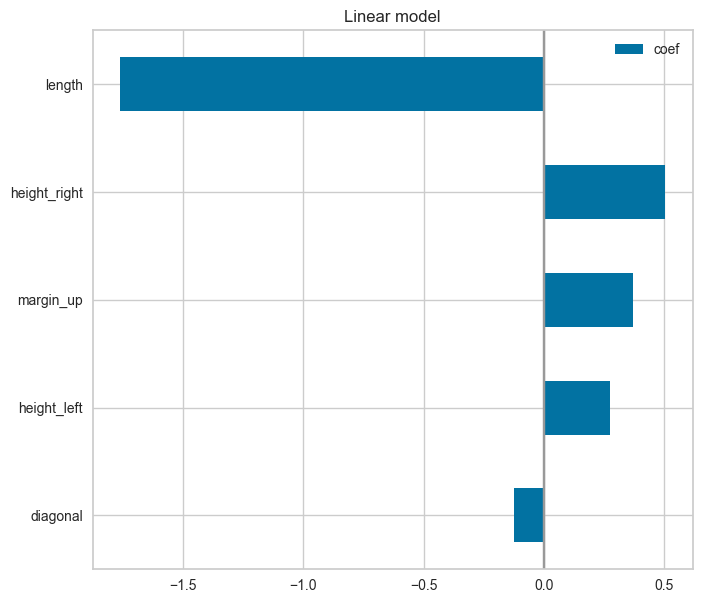

In [250]:
# top30 most important features
(df_feature_importance
 .sort_values("coef", key=lambda v: abs(v), ascending=True)
 .plot(kind="barh", figsize=(10, 7))
)
plt.title("Linear model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);

## Elastic Net

In [260]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import pandas as pd

# Charger les données (ajustez cette étape en fonction de votre cas)
# Exemple : data = pd.read_csv('votre_fichier.csv')
# X = data.drop('cible', axis=1)
# y = data['cible']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le pipeline Elastic Net
reg_elastic_pipe = Pipeline(steps=[
    ("scaler", MinMaxScaler()),
    ("regressor", ElasticNet())
])

# Définir la grille des hyperparamètres pour Elastic Net
param_grid_elastic = {
    "regressor__alpha": [0.001, 0.01, 0.1, 1, 10, 100],
    "regressor__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9, 1],
    "regressor__fit_intercept": [True, False]
}

# Créer l'objet GridSearchCV pour Elastic Net
grid_search_elastic = GridSearchCV(reg_elastic_pipe, param_grid_elastic, cv=10, scoring="r2", return_train_score=True)

# Effectuer la recherche sur la grille pour Elastic Net
grid_search_elastic.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score pour Elastic Net
print("Meilleurs paramètres pour Elastic Net:", grid_search_elastic.best_params_)
print("Meilleur score R2 pour Elastic Net:", grid_search_elastic.best_score_)


Meilleurs paramètres pour Elastic Net: {'regressor__alpha': 0.001, 'regressor__fit_intercept': True, 'regressor__l1_ratio': 0.1}
Meilleur score R2 pour Elastic Net: 0.45725272839341463


##  features pour la regression Elastic Net

In [263]:
# Générer la feature importance pour Elastic net
df_feature_importance = pd.DataFrame(grid_search_elastic.best_estimator_[-1].coef_, columns=["coef"], index=grid_search_elastic.feature_names_in_)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance.head()

Shape: (5, 1)


coef
diagonal     -0.156502
height_left   0.296283
height_right  0.526133
margin_up     0.403018
length       -1.715256

In [265]:
cv_results_df = pd.DataFrame(grid_search_elastic.cv_results_)
cv_results_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.004598      0.000663         0.001999        0.000632   
1        0.004298      0.001099         0.001901        0.000702   
2        0.003796      0.000599         0.001699        0.000458   
3        0.005496      0.001431         0.001999        0.000894   
4        0.004697      0.001187         0.001899        0.000830   
..            ...           ...              ...             ...   
67       0.003598      0.000663         0.001499        0.000500   
68       0.003599      0.000491         0.001098        0.000300   
69       0.003298      0.000458         0.001498        0.000498   
70       0.003096      0.000296         0.001799        0.000400   
71       0.003497      0.000668         0.001499        0.000500   

   param_regressor__alpha param_regressor__fit_intercept  \
0                   0.001                           True   
1                   0.001                           True   
2                   0.001                           True   
3                   0.001                           True   
4                   0.001                           True   
..                    ...                            ...   
67                    100                          False   
68                    100                          False   
69                    100                          False   
70                    100                          False   
71                    100                          False   

   param_regressor__l1_ratio  \
0                        0.1   
1                        0.3   
2                        0.5   
3                        0.7   
4                        0.9   
..                       ...   
67                       0.3   
68                       0.5   
69                       0.7   
70                       0.9   
71                         1   

                                               params  split0_test_score  \
0   {'regressor__alpha': 0.001, 'regressor__fit_in...           0.329453   
1   {'regressor__alpha': 0.001, 'regressor__fit_in...           0.327926   
2   {'regressor__alpha': 0.001, 'regressor__fit_in...           0.326337   
3   {'regressor__alpha': 0.001, 'regressor__fit_in...           0.324683   
4   {'regressor__alpha': 0.001, 'regressor__fit_in...           0.322959   
..                                                ...                ...   
67  {'regressor__alpha': 100, 'regressor__fit_inte...         -41.861013   
68  {'regressor__alpha': 100, 'regressor__fit_inte...         -41.861013   
69  {'regressor__alpha': 100, 'regressor__fit_inte...         -41.861013   
70  {'regressor__alpha': 100, 'regressor__fit_inte...         -41.861013   
71  {'regressor__alpha': 100, 'regressor__fit_inte...         -41.861013   

    split1_test_score  ...  split2_train_score  split3_train_score  \
0            0.456416  ...            0.470777            0.465628   
1            0.456055  ...            0.470790            0.465650   
2            0.455665  ...            0.470786            0.465653   
3            0.455246  ...            0.470762            0.465634   
4            0.454795  ...            0.470718            0.465592   
..                ...  ...                 ...                 ...   
67         -45.836269  ...          -44.956114          -45.682648   
68         -45.836269  ...          -44.956114          -45.682648   
69         -45.836269  ...          -44.956114          -45.682648   
70         -45.836269  ...          -44.956114          -45.682648   
71         -45.836269  ...          -44.956114          -45.682648   

    split4_train_score  split5_train_score  split6_train_score  \
0             0.464803            0.466763            0.478062   
1             0.464822            0.466784            0.478079   
2             0.464823            0.466786            0.478077   
3             0.464804            0.466769            0.478056 

## important features

In [272]:
# Récupérer les meilleurs paramètres du modèle Elastic Net
best_params = grid_search_elastic.best_params_

# Recréer le modèle ElasticNet avec les meilleurs paramètres
best_elastic_model = ElasticNet(
    alpha=best_params["regressor__alpha"],
    l1_ratio=best_params["regressor__l1_ratio"],
    fit_intercept=best_params["regressor__fit_intercept"]
)

# Entraîner le modèle sur l’ensemble d’entraînement complet
best_elastic_model.fit(X_train, y_train)

# Créer un DataFrame pour les coefficients des features
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coef': best_elastic_model.coef_
})

# Trier les features par importance (valeur absolue des coefficients) et sélectionner les 30 plus importantes
top_features = (feature_importance
                .reindex(feature_importance['coef'].abs().sort_values(ascending=False).index)
                .head(30))

# Afficher les 30 features les plus importantes
plt.figure(figsize=(10, 8))
plt.barh(top_features['feature'], top_features['coef'], color='blue')
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Top 30 Most Important Features - Elastic Net")
plt.gca().invert_yaxis()  # Inverser pour avoir les plus importantes en haut
plt.show()

## Analyse des résultats

In [274]:


# Extraire les coefficients du modèle Elastic Net ajusté avec les meilleurs paramètres
elastic_net_best_model = grid_search_elastic.best_estimator_.named_steps['regressor']
elastic_net_coef = elastic_net_best_model.coef_

# Créer un DataFrame pour stocker les coefficients avec leurs noms de features
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": elastic_net_coef
})

# Trier les coefficients par valeur absolue pour les 30 features les plus importantes
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values("Abs_Coefficient", ascending=False).head(30)

# Visualisation des 30 features les plus importantes
plt.figure(figsize=(12, 8))
coef_df.plot(kind="barh", x="Feature", y="Abs_Coefficient", color="coral", legend=False)
plt.title('Top 30 Feature Importance - Elastic Net', fontsize=16)
plt.xlabel('Absolute Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.gca().invert_yaxis()  # Inverser l'axe pour avoir les plus grands coefficients en haut
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>